In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('framingham.csv')
data = data[~data.isin(['?'])]
data = data.dropna(axis=0)
data = data.apply(pd.to_numeric)

In [4]:
data.shape

(3658, 16)

In [5]:
from sklearn import model_selection

In [6]:
data=data.drop(['education'], 1)

In [7]:
X = data.drop(['TenYearCHD'], 1)
y = data['TenYearCHD']

In [8]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [9]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC

In [14]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = svm_clf.predict(X_test) 
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print("accuracy_score: \n",accuracy_score(y_test,y_pred))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))  
print("classification report: \n",classification_report(y_test,y_pred)) 

accuracy_score: 
 0.8565573770491803
confusion matrix: 
 [[627   1]
 [104   0]]
classification report: 
              precision    recall  f1-score   support

          0       0.86      1.00      0.92       628
          1       0.00      0.00      0.00       104

avg / total       0.74      0.86      0.79       732



In [18]:
import pickle

In [19]:
pickle.dump(scaler, open('std_scaler.sav', 'wb'))
pickle.dump(svm_clf, open('model_svm.sav', 'wb'))

In [20]:
from scipy import stats
import numpy as np
data[(np.abs(stats.zscore(data)) > 0.1).all(axis=1)]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
255,0,60,0,0.0,1.0,1,1,0,252.0,189.0,110.0,28.77,54.0,70.0,0
475,1,53,1,15.0,0.0,1,0,0,161.0,116.0,74.5,19.82,80.0,90.0,0
646,1,38,0,0.0,0.0,1,0,0,224.0,127.5,81.0,20.39,80.0,90.0,0
763,0,58,0,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
1553,1,67,1,15.0,0.0,1,1,0,285.0,155.0,90.0,30.42,70.0,77.0,1
2461,1,65,0,0.0,0.0,1,1,0,266.0,140.0,100.0,29.36,80.0,77.0,1
2471,1,52,0,0.0,0.0,1,0,0,202.0,136.0,94.0,29.93,83.0,67.0,1
2682,0,52,0,0.0,0.0,1,1,0,291.0,150.0,94.0,28.68,67.0,74.0,0
3136,0,60,1,15.0,0.0,1,1,0,254.0,177.0,101.0,23.27,92.0,79.0,1
3314,0,47,0,0.0,0.0,1,0,0,220.0,124.0,75.5,24.71,65.0,68.0,0


In [21]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


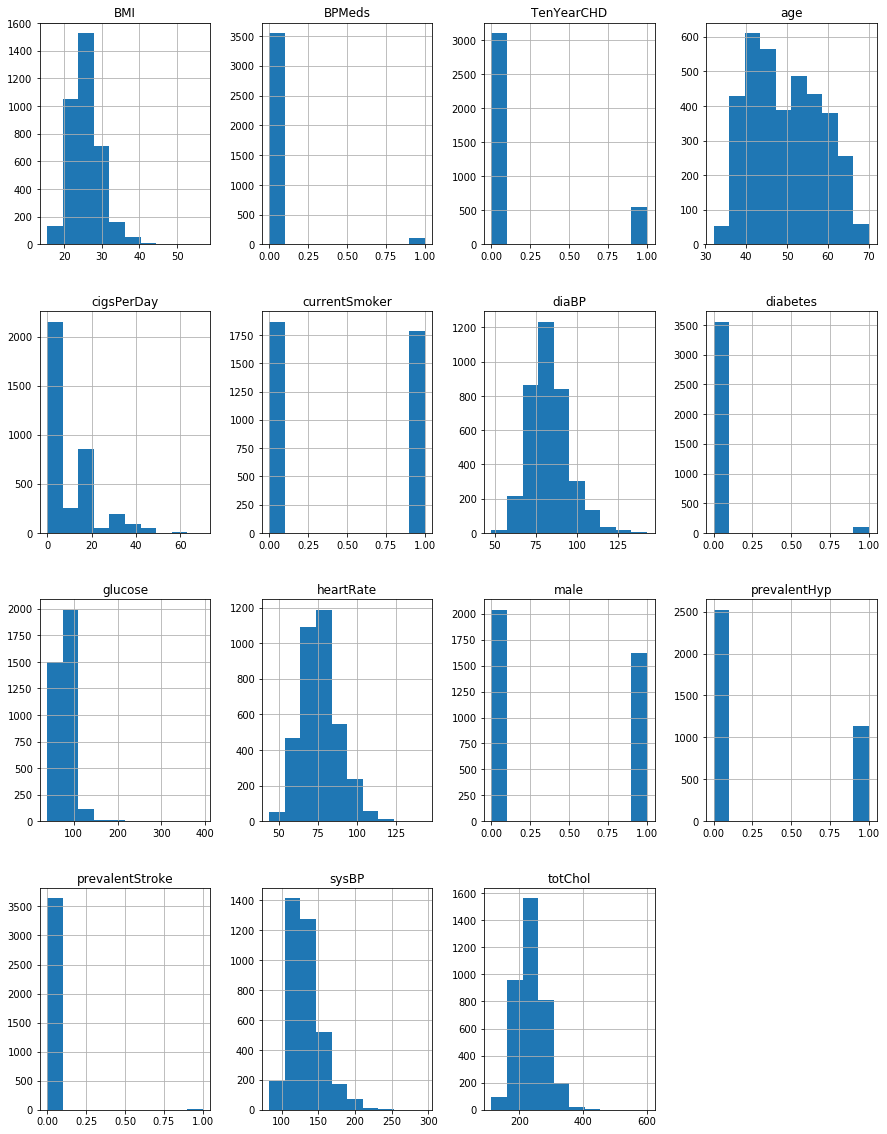

In [22]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
fig.savefig("Visualization.png")